In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

In [2]:
df = pd.read_excel("ECOMM DATA.xlsx")

In [3]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


# Display the first few rows to understand the structure of the data

In [4]:
print(df.head())

   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology  Accessories

# Calculate total sales

In [5]:
total_sales = df['Sales'].sum()
print("Total Sales: ${:,.2f}".format(total_sales))

Total Sales: $12,642,501.91


# Convert the 'Order Date' column to datetime format

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year and month from the 'Order Date' column

In [7]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Group by year and month and calculate total sales for each month

In [8]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

In [9]:
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

# Plot sales trends over time

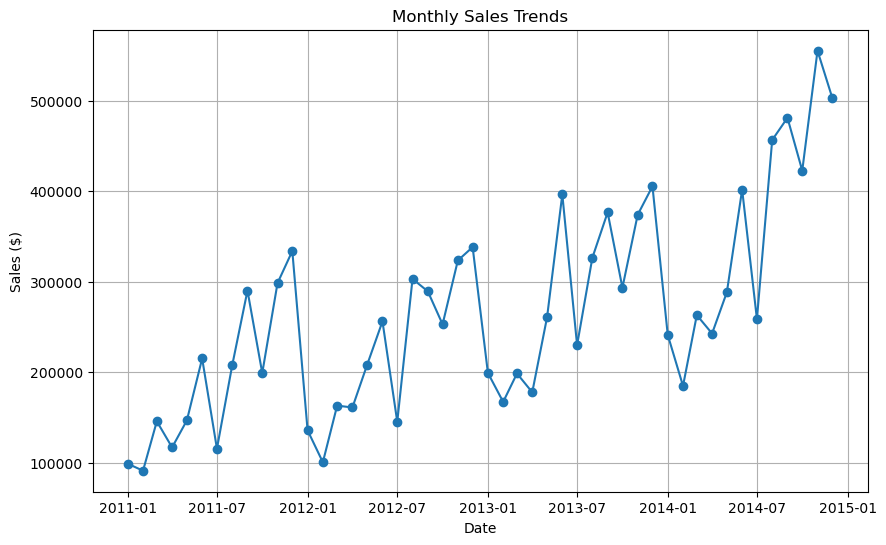

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Sales'], marker='o', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.show()

# Determine the best-selling products

In [11]:
best_selling_products = df.groupby(['Category', 'Sub-Category'])['Quantity'].sum().sort_values(ascending=False).head(5)
print("\nBest Selling Products:")
print(best_selling_products)


Best Selling Products:
Category         Sub-Category
Office Supplies  Binders         21429
                 Storage         16917
                 Art             16301
                 Paper           12822
Furniture        Chairs          12336
Name: Quantity, dtype: int64


# Visualize the best-selling products

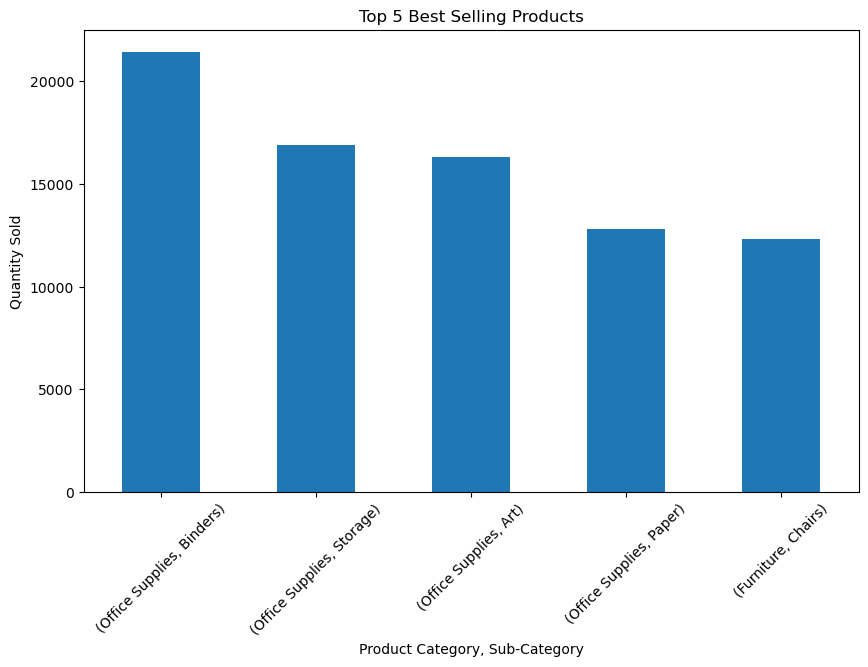

In [12]:
plt.figure(figsize=(10, 6))
best_selling_products.plot(kind='bar')
plt.title('Top 5 Best Selling Products')
plt.xlabel('Product Category, Sub-Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Customer Segmentation Analysis

In [13]:
customer_segmentation = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
print("\nCustomer Segmentation Analysis:")
print(customer_segmentation)


Customer Segmentation Analysis:
Segment
Consumer       6.507949e+06
Corporate      3.824698e+06
Home Office    2.309855e+06
Name: Sales, dtype: float64


# Visualize Customer Segmentation

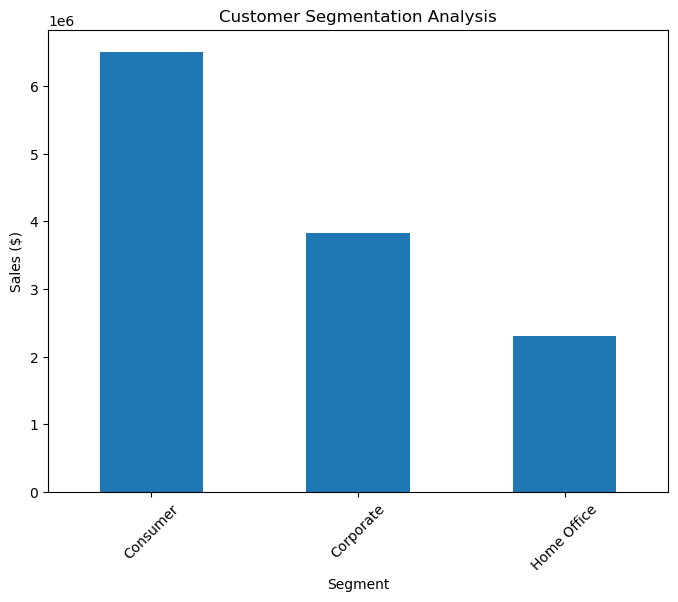

In [14]:
plt.figure(figsize=(8, 6))
customer_segmentation.plot(kind='bar')
plt.title('Customer Segmentation Analysis')
plt.xlabel('Segment')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.show()

# Profit Analysis

In [15]:
profit_analysis = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(5)
print("\nProfit Analysis:")
print(profit_analysis)


Profit Analysis:
Product Name
Canon imageCLASS 2200 Advanced Copier    25199.9280
Cisco Smart Phone, Full Size             17238.5206
Motorola Smart Phone, Full Size          17027.1130
Hoover Stove, Red                        11807.9690
Sauder Classic Bookcase, Traditional     10672.0730
Name: Profit, dtype: float64


# Visualize Profit Analysis

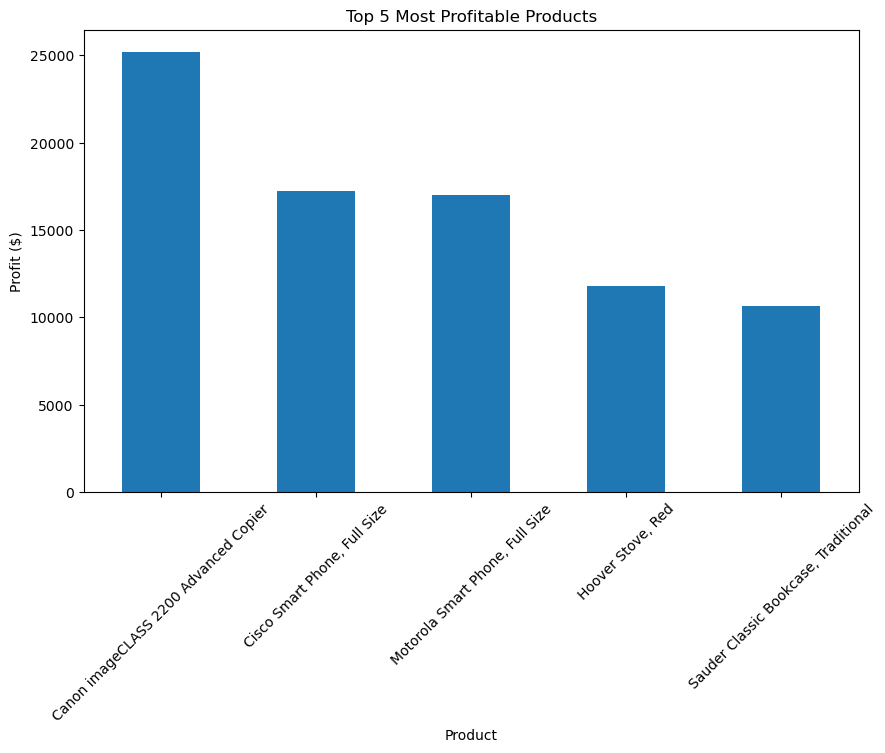

In [16]:
plt.figure(figsize=(10, 6))
profit_analysis.plot(kind='bar')
plt.title('Top 5 Most Profitable Products')
plt.xlabel('Product')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45)
plt.show()


# Discount Analysis

In [17]:
discount_analysis = df.groupby('Discount')['Sales'].sum()
print("\nDiscount Analysis:")
print(discount_analysis)


Discount Analysis:
Discount
0.000    6.992411e+06
0.002    2.613956e+05
0.070    1.216169e+05
0.100    1.579606e+06
0.150    3.060298e+05
0.170    2.473992e+05
0.200    1.203832e+06
0.202    1.621565e+04
0.250    8.805535e+04
0.270    8.935167e+04
0.300    1.889320e+05
0.320    1.449346e+04
0.350    9.570649e+04
0.370    3.161802e+04
0.400    5.595252e+05
0.402    3.373387e+04
0.450    3.339113e+04
0.470    8.343217e+04
0.500    3.241311e+05
0.550    6.308658e+03
0.570    8.144802e+03
0.600    1.845819e+05
0.602    4.977181e+03
0.650    6.579814e+03
0.700    1.397722e+05
0.800    2.046333e+04
0.850    7.968420e+02
Name: Sales, dtype: float64


# Visualize Discount Analysis

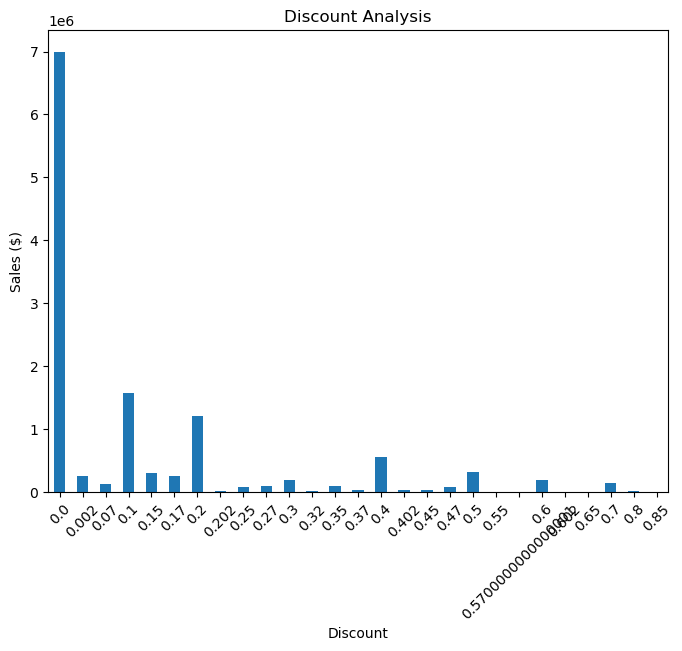

In [18]:
plt.figure(figsize=(8, 6))
discount_analysis.plot(kind='bar')
plt.title('Discount Analysis')
plt.xlabel('Discount')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.show()

# Geographical Analysis

In [19]:
geographical_analysis = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nGeographical Analysis:")
print(geographical_analysis)


Geographical Analysis:
State
England                   485170.9710
California                457687.6315
Ile-de-France             317822.5440
New York                  310876.2710
New South Wales           270487.1040
Queensland                238312.7340
North Rhine-Westphalia    216451.8510
Texas                     170188.0458
San Salvador              153639.3970
National Capital          152175.3555
Name: Sales, dtype: float64


# Visualize Geographical Analysis

In [ ]:
plt.figure(figsize=(10, 6))
geographical_analysis.plot(kind='bar')
plt.title('Top 10 States by Sales')
plt.xlabel('State')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.show()